<a href="https://colab.research.google.com/github/TanmayWINTR/Genetic-Algorithm-with-Iris-Dataset/blob/main/Genetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function

In [ ]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import datasets, linear_model

In [ ]:
!pip install sklearn-genetic


     |████████████████████████████████| 160 kB 38.7 MB/s 


In [ ]:
from genetic_selection import GeneticSelectionCV

In [ ]:
iris = datasets.load_iris()

In [ ]:
 e = num.random.uniform(0, 0.2, size=(len(iris.data), 30))

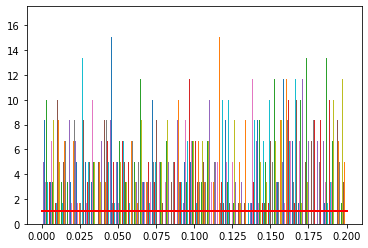

In [ ]:
count, bins, ignored= plt.hist(e, bins = 50, density = True)
plt.plot(bins, num.ones_like(bins), linewidth=2, color='r') 
plt.show( )

In [ ]:
x = num.hstack((iris.data, e))
Y = iris.target


In [ ]:
data1 = pd.DataFrame(data= num.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target_names'])

In [ ]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


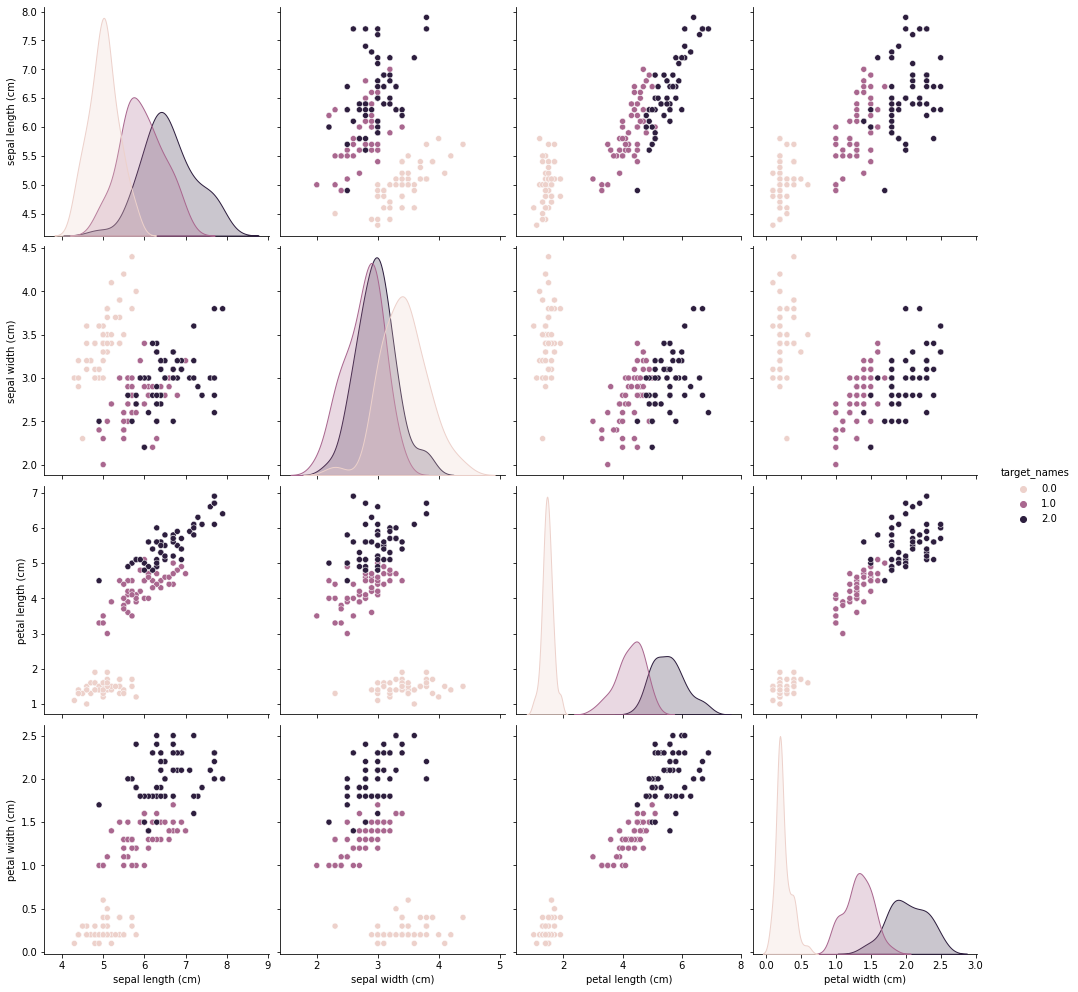

In [ ]:
sns.pairplot(data1, hue='target_names', size=3.5);

In [ ]:
estimators = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

selectors = GeneticSelectionCV(estimators, cv=6, verbose=2, scoring="accuracy", max_features=6, n_population=60,  crossover_proba=0.6, mutation_proba=0.2, n_generations=50,crossover_independent_proba=0.6, mutation_independent_proba=0.06, tournament_size=4,n_gen_no_change=20, caching=True, n_jobs=-2)


In [ ]:
selectors = selectors.fit(x, Y)
                                        # support_ - The mask of selected features.


Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                            
0  	60    	[ 0.447444  3.516667  0.06515 ]	[ 0.210879  1.76533   0.018114]	[ 0.24      1.        0.029814]	[ 0.946667  6.        0.096379]
1  	40    	[-1666.122778     4.566667  1666.719451]	[ 3727.023203     1.792267  3726.756357]	[-10000.            2.            0.029814]	[     0.946667      9.        10000.      ]
2  	38    	[-999.217333    4.866667 1000.050486]   	[ 3000.26089      1.396026  2999.983171]	[-10000.            3.            0.035901]	[     0.953333      9.        10000.      ]
3  	41    	[-1332.539778     4.983333  1333.376818]	[ 3399.657601     1.271373  3399.329286]	[-10000.            3.            0.035901]	[     0.96      8.    10000.  ]            
4  	45    	[-332.425889    5.033333  333.37572 ]   	[ 1795.223444     1.032258  1795.047065]	[-10000.            3.            0.029814]

In [ ]:
print(selectors.support_)


[ True False  True  True False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False]
